In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import numpy as np




In [2]:
#Membaca dataset dari file ke pandas 
df = pd.read_csv('datasetnilaiakademik.csv', header=0)


In [3]:
df.head()

,inggrisa,alproa,aljabarlinear,fisikadasar,kalkulusa,aptia,inggrisb,alprob,kalkulusb,aptib,...,sdprak,jarkom,jarkomprak,matdis,mpa,sbdl,sbdlprak,sc,tbo,konsentrasi
0,b,b,b,a,b,a,b,a,b,b,...,c,b,a,b,b,b,a,c,a,0
1,b,b,c,b,c,a,b,a,b,b,...,b,b,b,c,c,b,b,c,b,0
2,b,b,b,b,c,a,b,c,c,a,...,b,c,c,b,d,d,c,c,b,0
3,b,b,a,a,a,a,b,a,a,b,...,b,b,a,b,b,a,a,b,a,1
4,c,b,c,c,d,a,b,c,b,c,...,c,c,b,b,b,c,b,b,a,2


In [4]:
df['inggrisa'] = df['inggrisa'].str.lower()
df['alproa'] = df['alproa'].str.lower()
df['aljabarlinear'] = df['aljabarlinear'].str.lower()
df['fisikadasar'] = df['fisikadasar'].str.lower()
df['kalkulusa'] = df['kalkulusa'].str.lower()
df['aptia'] = df['aptia'].str.lower()
df['inggrisb'] = df['inggrisb'].str.lower()
df['alprob'] = df['alprob'].str.lower()
df['kalkulusb'] = df['kalkulusb'].str.lower()
df['aptib'] = df['aptib'].str.lower()
df['statistika'] = df['statistika'].str.lower()
df['pemdas'] = df['pemdas'].str.lower()
df['pemdasprak'] = df['pemdasprak'].str.lower()
df['pemweb'] = df['pemweb'].str.lower()
df['pemwebprak'] = df['pemwebprak'].str.lower()
df['pbo'] = df['pbo'].str.lower()
df['pboprak'] = df['pboprak'].str.lower()
df['sbd'] = df['sbd'].str.lower()
df['sbdprak'] = df['sbdprak'].str.lower()
df['sd'] = df['sd'].str.lower()
df['sdprak'] = df['sdprak'].str.lower()
df['jarkom'] = df['jarkom'].str.lower()
df['jarkomprak'] = df['jarkomprak'].str.lower()
df['matdis'] = df['matdis'].str.lower()
df['mpa'] = df['mpa'].str.lower()
df['sbdl'] = df['sbdl'].str.lower()
df['sbdlprak'] = df['sbdlprak'].str.lower()
df['sc'] = df['sc'].str.lower()
df['tbo'] = df['tbo'].str.lower()


In [5]:
df.isna().sum()

inggrisa         0
alproa           0
aljabarlinear    0
fisikadasar      0
kalkulusa        0
aptia            0
inggrisb         0
alprob           1
kalkulusb        0
aptib            0
statistika       0
pemdas           1
pemdasprak       2
pemweb           3
pemwebprak       3
pbo              1
pboprak          6
sbd              1
sbdprak          2
sd               1
sdprak           9
jarkom           1
jarkomprak       1
matdis           4
mpa              3
sbdl             3
sbdlprak         5
sc               3
tbo              4
konsentrasi      0
dtype: int64

In [6]:
# mengisi nilai kosong
df['alprob'] = df['alprob'].fillna("c")
df['pemdas'] = df['pemdas'].fillna("b") 
df['pemdasprak'] = df['pemdasprak'].fillna("b")
df['pemweb'] = df['pemweb'].fillna("b")
df['pemwebprak'] = df['pemwebprak'].fillna("b")
df['pbo'] = df['pbo'].fillna("b")
df['pboprak'] = df['pboprak'].fillna("b")
df['sbd'] = df['sbd'].fillna("b")
df['sbdprak'] = df['sbdprak'].fillna("b")
df['sd'] = df['sd'].fillna("b")
df['sdprak'] = df['sdprak'].fillna("b")
df['jarkom'] = df['jarkom'].fillna("b")
df['jarkomprak'] = df['jarkomprak'].fillna("b")
df['matdis'] = df['matdis'].fillna("b")
df['mpa'] = df['mpa'].fillna("b")
df['sbdl'] = df['sbdl'].fillna("b")
df['sbdlprak'] = df['sbdlprak'].fillna("b")
df['sc'] = df['sc'].fillna("b")
df['tbo'] = df['tbo'].fillna("c")


In [7]:
df.isna().sum()


inggrisa         0
alproa           0
aljabarlinear    0
fisikadasar      0
kalkulusa        0
aptia            0
inggrisb         0
alprob           0
kalkulusb        0
aptib            0
statistika       0
pemdas           0
pemdasprak       0
pemweb           0
pemwebprak       0
pbo              0
pboprak          0
sbd              0
sbdprak          0
sd               0
sdprak           0
jarkom           0
jarkomprak       0
matdis           0
mpa              0
sbdl             0
sbdlprak         0
sc               0
tbo              0
konsentrasi      0
dtype: int64

In [8]:
# creating instance of labelencoder (mengencode string menjadi numerik)
labelencoder = LabelEncoder()

In [9]:
# Assigning numerical values and storing in another column
df['inggrisa'] = labelencoder.fit_transform(df['inggrisa'])
df['alproa'] = labelencoder.fit_transform(df['alproa'])
df['aljabarlinear'] = labelencoder.fit_transform(df['aljabarlinear'])
df['fisikadasar'] = labelencoder.fit_transform(df['fisikadasar'])
df['kalkulusa'] = labelencoder.fit_transform(df['kalkulusa'])
df['aptia'] = labelencoder.fit_transform(df['aptia'])
df['inggrisb'] = labelencoder.fit_transform(df['inggrisb'])
df['alprob'] = labelencoder.fit_transform(df['alprob'])
df['kalkulusb'] = labelencoder.fit_transform(df['kalkulusb'])
df['aptib'] = labelencoder.fit_transform(df['aptib'])
df['statistika'] = labelencoder.fit_transform(df['statistika'])
df['pemdas'] = labelencoder.fit_transform(df['pemdas'])
df['pemdasprak'] = labelencoder.fit_transform(df['pemdasprak'])
df['pemweb'] = labelencoder.fit_transform(df['pemweb'])
df['pemwebprak'] = labelencoder.fit_transform(df['pemwebprak'])
df['pbo'] = labelencoder.fit_transform(df['pbo'])
df['pboprak'] = labelencoder.fit_transform(df['pboprak'])
df['sbd'] = labelencoder.fit_transform(df['sbd'])
df['sbdprak'] = labelencoder.fit_transform(df['sbdprak'])
df['sd'] = labelencoder.fit_transform(df['sd'])
df['sdprak'] = labelencoder.fit_transform(df['sdprak'])
df['jarkom'] = labelencoder.fit_transform(df['jarkom'])
df['jarkomprak'] = labelencoder.fit_transform(df['jarkomprak'])
df['matdis'] = labelencoder.fit_transform(df['matdis'])
df['mpa'] = labelencoder.fit_transform(df['mpa'])
df['sbdl'] = labelencoder.fit_transform(df['sbdl'])
df['sbdlprak'] = labelencoder.fit_transform(df['sbdlprak'])
df['sc'] = labelencoder.fit_transform(df['sc'])
df['tbo'] = labelencoder.fit_transform(df['tbo'])

In [10]:
df.head()

,inggrisa,alproa,aljabarlinear,fisikadasar,kalkulusa,aptia,inggrisb,alprob,kalkulusb,aptib,...,sdprak,jarkom,jarkomprak,matdis,mpa,sbdl,sbdlprak,sc,tbo,konsentrasi
0,1,1,1,0,1,0,1,0,1,1,...,2,1,0,1,1,1,0,2,0,0
1,1,1,2,1,2,0,1,0,1,1,...,1,1,1,2,2,1,1,2,1,0
2,1,1,1,1,2,0,1,2,2,0,...,1,2,2,1,3,3,2,2,1,0
3,1,1,0,0,0,0,1,0,0,1,...,1,1,0,1,1,0,0,1,0,1
4,2,1,2,2,3,0,1,2,1,2,...,2,2,1,1,1,2,1,1,0,2


In [11]:
#feature engineering (mengambil atribut yang ingin digunakan)
X = df[['inggrisa', 'alproa', 'aljabarlinear', 'fisikadasar', 'kalkulusa', 'aptia', 'inggrisb',
        'alprob', 'kalkulusb', 'aptib', 'statistika', 'pemdas', 'pemdasprak', 'pemweb', 'pemwebprak', 
        'pbo','pboprak','sbd','sd', 'sdprak','sbdprak','jarkom','jarkomprak','matdis','mpa','sbdl','sbdlprak','sc','tbo']]


In [12]:
#memisahkan Feature dengan class
y=df.konsentrasi


In [13]:
# membagi dari total data menjadi 70% data Latih dan 30% data Uji 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [14]:
# #mengeksport data yang telah di pisahkan
# X_train.to_csv('Data_Latih_Fitur.csv',index=False)
# y_train.to_csv('Data_Latih_Target.csv',index=False)
# X_test.to_csv('Data_Testing_Fitur.csv',index=False)
# y_test.to_csv('Data_Testing_Target.csv',index=False)

In [15]:
#mencaritahu proporsi unik di kolom atribut
# df.konsentrasi.value_counts()

In [16]:
#mendefinisikan model svm
clf = svm.SVC(kernel='linear', C=0.1, probability=True, verbose=True)
print(clf)


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True)


In [17]:
clf = clf.fit(X_train, y_train)
print('w = ', clf.coef_)
print('b = ', clf.intercept_)
# print('c = ', clf.verbose)
print(clf.verbose)
# print('c = ', clf.coef_[1])
# print('c = ', clf._dense_fit)

# print('Indices of support vectors = ', clf.support_)
# print('Support vectors = ', clf.support_vectors_)
# print('Number of support vectors for each class = ', clf.n_support_)
# print('Coefficients of the support vector in the decision function = ',
      #np.abs(clf.dual_coef_))
# clf = clf.fit(X_train, y_train)
# scores = cross_val_score(clf, X_train, y_train, cv=20)
# scores



[LibSVM]w =  [[-0.30220869  0.22674671  0.40408515  0.40632944  0.34755471 -0.18129996
   0.00312092  0.21052435 -0.22051736 -0.14634339 -0.13319735  0.15220025
  -0.17904101  0.14888172  0.30179768  0.07537115 -0.19262949  0.23229954
  -0.18321442  0.09863807  0.29577878 -0.070627   -0.20147696  0.28465358
   0.27691675  0.12543497  0.08265738 -0.27607173 -0.03382639]
 [-0.06302404  0.1371047   0.28985539  0.05581488  0.03441627 -0.02064359
  -0.08966752  0.04851748  0.33724274 -0.37112463 -0.0179041   0.10294037
   0.04467038  0.10842511  0.20107512 -0.3524653   0.16020436  0.04641326
  -0.70631343 -0.11471004  0.14186915  0.1462392  -0.04473954  0.30932027
  -0.00984644  0.00209718 -0.28403325  0.01742739 -0.10895543]
 [ 0.20137886 -0.05429589 -0.10341671 -0.09802688  0.13493705 -0.11085843
  -0.1362228   0.06659512  0.02472068 -0.44130945  0.10570259  0.10447441
   0.04855231  0.02317481 -0.10671315 -0.40227226  0.26989693  0.06594635
  -0.24719268 -0.30935239 -0.22876091  0.259948

In [42]:
print(clf.predict(X_train))

[1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 2 1 0 2 1 1 0 1 0 0 1 0 0 0 0 2 0 1 0
 0 0 0 1 1 1 0 0 0 1 2 1 0 0 0 1 1 1 2 0 1 0 1 1 0 1 1 0 0 1 0 2 0 0 0 0 0
 0 2 0 1 1 0 0 1 1 1 0 2 0 1 2 2 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1]


In [18]:
# clf = clf.decision_function(X_train)
# print(clf)


In [19]:
# #melakukan training model
# from sklearn.model_selection import cross_val_score
# clf = clf.fit(X_train, y_train)
# scores = cross_val_score(clf, X_train, y_train, cv=20)
# scores


In [20]:
# prediksi = clf.predict(X_train)
# print('Label Sebenarnya = ', y_train)
# print('Hasil Prediksi = ', prediksi)



In [21]:
# def predict(self, X):
   
#         X = self._validate_for_predict(X)
#         predict = self._sparse_predict if self._sparse else self._dense_predict
#         return predict(X)

In [22]:
X_test.head()


,inggrisa,alproa,aljabarlinear,fisikadasar,kalkulusa,aptia,inggrisb,alprob,kalkulusb,aptib,...,sdprak,sbdprak,jarkom,jarkomprak,matdis,mpa,sbdl,sbdlprak,sc,tbo
115,2,2,1,1,2,2,1,2,2,3,...,0,1,1,2,1,1,1,0,1,1
106,2,0,0,1,2,1,2,0,2,0,...,1,2,3,2,1,2,1,1,1,2
59,1,0,0,0,1,0,1,2,0,1,...,0,2,0,0,0,1,0,1,1,2
27,2,2,2,2,3,3,1,2,3,1,...,3,3,4,2,1,4,2,3,2,2
41,1,1,0,1,2,1,0,1,2,0,...,0,1,0,0,1,0,0,0,1,1


In [23]:
y_test.head()

115    0
106    0
59     1
27     0
41     0
Name: konsentrasi, dtype: int64

In [24]:
# prediksi data uji
hasilPrediksi = clf.predict(X_train)
print('Label Sebenarnya = ', y_train)
print('Hasil Prediksi = ', hasilPrediksi)
print(clf.predict_proba(X_train))





Label Sebenarnya =  3      1
87     2
88     0
38     2
62     1
      ..
0      0
126    0
34     1
140    1
118    1
Name: konsentrasi, Length: 105, dtype: int64
Hasil Prediksi =  [1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 2 1 0 2 1 1 0 1 0 0 1 0 0 0 0 2 0 1 0
 0 0 0 1 1 1 0 0 0 1 2 1 0 0 0 1 1 1 2 0 1 0 1 1 0 1 1 0 0 1 0 2 0 0 0 0 0
 0 2 0 1 1 0 0 1 1 1 0 2 0 1 2 2 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1]
[[0.33481617 0.43304118 0.23214265]
 [0.42310729 0.29215056 0.28474215]
 [0.6595428  0.1521405  0.1883167 ]
 [0.38979218 0.2499956  0.36021222]
 [0.55738814 0.32709298 0.11551888]
 [0.55115531 0.23789319 0.21095151]
 [0.54946296 0.20676099 0.24377606]
 [0.51083886 0.33465476 0.15450638]
 [0.39529567 0.46365021 0.14105412]
 [0.57249242 0.18417698 0.24333061]
 [0.36210099 0.50797148 0.12992753]
 [0.42711034 0.32031512 0.25257454]
 [0.38341524 0.37501674 0.24156802]
 [0.38185698 0.4251037  0.19303932]
 [0.60118879 0.19308084 0.20573038]
 [0.50465244 0.20309955 0.29224801]
 [0.36764936 0.46063061 0.17

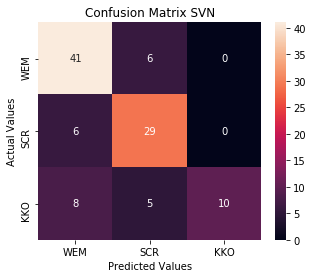

              precision    recall  f1-score   support

         WEM       0.75      0.87      0.80        47
         SCR       0.72      0.83      0.77        35
         KKO       1.00      0.43      0.61        23

    accuracy                           0.76       105
   macro avg       0.82      0.71      0.73       105
weighted avg       0.79      0.76      0.75       105



In [25]:
cm = confusion_matrix(y_train, hasilPrediksi)
cm_df = pd.DataFrame(cm,
                     index = ['WEM','SCR','KKO'],
                     columns = ['WEM','SCR','KKO'])
plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix SVN')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
target = ['WEM', 'SCR', 'KKO']
print(classification_report(y_train, hasilPrediksi, target_names=target))


In [26]:
proba = clf.predict_proba(X_test)
print(proba)


[[0.30779576 0.46642756 0.22577668]
 [0.42447638 0.41567659 0.15984703]
 [0.28352398 0.4443974  0.27207862]
 [0.50684884 0.14712923 0.34602193]
 [0.39259255 0.50027201 0.10713544]
 [0.39315376 0.43549301 0.17135323]
 [0.34546708 0.5392739  0.11525902]
 [0.61858062 0.29726845 0.08415093]
 [0.28963889 0.48995492 0.22040619]
 [0.25980765 0.4438494  0.29634294]
 [0.42713319 0.15728372 0.41558309]
 [0.25609087 0.60939739 0.13451174]
 [0.35377105 0.486267   0.15996196]
 [0.22027776 0.41883481 0.36088743]
 [0.33518146 0.53421761 0.13060093]
 [0.3269951  0.39248668 0.28051822]
 [0.55917073 0.32670428 0.11412499]
 [0.40162381 0.44540156 0.15297463]
 [0.77904197 0.072708   0.14825003]
 [0.3701531  0.31181915 0.31802774]
 [0.39151079 0.48796823 0.12052098]
 [0.52149089 0.35815774 0.12035137]
 [0.31022591 0.35743345 0.33234064]
 [0.6227104  0.1424723  0.2348173 ]
 [0.40166679 0.4277103  0.17062292]
 [0.37167101 0.2681622  0.36016679]
 [0.28526888 0.50809297 0.20663815]
 [0.28261002 0.48942425 0.22

In [27]:
#membuat hasil prediksi dari array menjadi dataFrame
hasil = pd.DataFrame(hasilPrediksi, columns = ['Predicted'])
hasil.head()

,Predicted
0,1
1,0
2,0
3,0
4,0


In [28]:
#eksport hasil prediksi
#hasil.to_csv('Data_Hasil.csv',index=False)
#y_test.to_csv('Data_Target.csv',index=False)

In [29]:
hasilPrediksi = clf.predict(X_test)
print('Label Sebenarnya = ', y_test)
print('Hasil Prediksi = ', hasilPrediksi)


Label Sebenarnya =  115    0
106    0
59     1
27     0
41     0
9      0
97     1
71     1
47     1
114    2
91     2
84     1
15     0
94     1
46     2
5      1
136    1
31     0
148    0
24     0
77     1
42     0
147    1
78     2
57     0
21     0
49     2
75     1
143    0
66     2
117    0
142    1
6      0
133    0
112    2
122    2
67     0
7      2
53     0
109    2
90     0
128    1
35     2
105    1
43     0
141    2
Name: konsentrasi, dtype: int64
Hasil Prediksi =  [1 1 1 0 1 1 1 0 1 1 2 1 1 2 1 0 0 1 0 2 1 0 2 0 1 2 1 1 1 0 0 1 1 0 2 2 2
 2 0 0 2 0 1 1 1 0]


In [30]:
#membuat confusion matrix
cm = confusion_matrix(y_test, hasilPrediksi)

In [31]:
#mendefinisikan index confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['WEM','SCR','KKO'],
                     columns = ['WEM','SCR','KKO'])

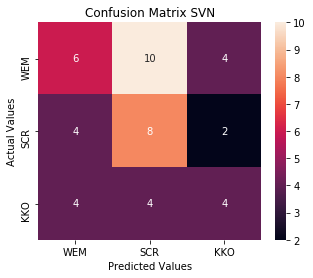

In [32]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix SVN')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [33]:
print(cm_df)


     WEM  SCR  KKO
WEM    6   10    4
SCR    4    8    2
KKO    4    4    4


In [34]:
#model report
target = ['WEM', 'SCR', 'KKO']
print(classification_report(y_test, hasilPrediksi, target_names=target))


              precision    recall  f1-score   support

         WEM       0.43      0.30      0.35        20
         SCR       0.36      0.57      0.44        14
         KKO       0.40      0.33      0.36        12

    accuracy                           0.39        46
   macro avg       0.40      0.40      0.39        46
weighted avg       0.40      0.39      0.38        46



In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test, cv=5)
scores


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

array([0.3       , 0.66666667, 0.44444444, 0.44444444, 0.11111111])

In [36]:
print(cross_val_score)

<function cross_val_score at 0x000001129087F0D8>


In [37]:
# from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,proba,multi_class='ovr')


0.676791101055807

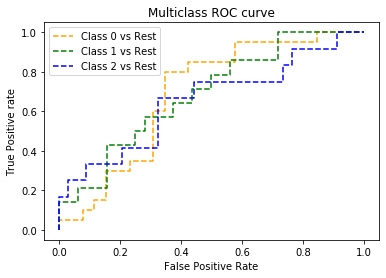

In [38]:
# roc curve for classes
fpr = {}
tpr = {}
thresh = {}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(
        y_test, proba[:, i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC', dpi=300)


In [39]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test,prediksi))

NameError: name 'prediksi' is not defined

In [ ]:
#membuat data baru
baru = [[1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 0,
         3, 1, 3, 1, 2, 0, 2, 0, 1, 1, 2, 0, 0, 2, 4]]


In [ ]:
#memprediksi data baru
hasilPrediksi = clf.predict(baru)

In [ ]:
#hasil data baru
# print('Hasil Prediksi = ', hasilPrediksi)
# if (hasilPrediksi == 0):
#       print('WEM')
# if (hasilPrediksi == 1):
#       print('SCR')
# if (hasilPrediksi == 2):
#       print('KKO')
prediction = clf.predict(baru)
output = int(prediction[0])
probas = clf.predict_proba(baru)
output_probability = float(probas[:, output].round(3))
# output dictionary
konsentrasi = {0: "WEM", 1: "SCR", 2: "KKO"}
# show results
result = {"prediction": konsentrasi[output],
          "confidence_score": output_probability}

print(result)


{'prediction': 'SCR', 'confidence_score': 0.381}


In [ ]:
import pickle

In [ ]:
# filename = 'modelsvm5.sav'
# pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# #load model yang sudah di simpan
# loaded_model = pickle.load(open('model.sav','rb'))


In [ ]:
#membuat data baru
# baru = [[1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 
#         0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 
#         1, 2, 1, 0, 1, 1, 1, 2, 0]]
# hasilPrediksi = loaded_model.predict(baru)
# if (hasilPrediksi == 0):
#     print('WEM')
# if (hasilPrediksi == 1):
#     print('SCR')
# if (hasilPrediksi == 2):
#     print('KKO')
